# Data Processing

## Import Packages 

In [ ]:
from google.colab import files
import pandas as pd
import io
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk, re, string, collections
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import spacy
import string
import re
import inflect
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
!pip install adjustText
from adjustText import adjust_text
!pip install liwc
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=8105c3eb6895cb179a1119443d60f96d3c3af9a0776a1874b081a517ab937eab
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Read the Resturent Review Dataset

In [ ]:
# Upload the dataset and read the review dataset
uploaded = files.upload()
df1 = pd.read_csv(io.BytesIO(uploaded['restaurant_reviews.csv']),encoding='cp1252')
# iterating the columns
for col in df1.columns:
    print(col)
#Print amount of each class
print(len(df1[df1['Real']==0]))
print(len(df1[df1['Real']==1]))

Saving restaurant_reviews.csv to restaurant_reviews.csv
Restaurant
Review
Real
Reviewer
F1-AWL
F2-PAU
F3-ANP
F4-ASL
F5-NCL
F6-NWO
F7-NVB
F8-NAJ
F9-NPV
F10-EMO
F11-CDV
F12-RED
F13-LXD
F14-NMV
F15-NTY
55
55


## Real the Computer Generated Fake Review Dataset

In [ ]:
# Upload the dataset and read the review dataset
uploaded = files.upload()
df2 = pd.read_csv(io.BytesIO(uploaded['fake_reviews_dataset.csv']),encoding='cp1252')
# iterating the columns
for col in df2.columns:
    print(col)

#Print amount of each class
print(len(df2[df2['label']=='CG']))
print(len(df2[df2['label']=='OR']))

Saving fake_reviews_dataset.csv to fake_reviews_dataset.csv
category
rating
label
text_
20216
20216


## Marge two Datasets

In [ ]:
df = pd.DataFrame()
df['Review'] = ['']*(len(df1['Real'])+len(df2['label']))
df['Real'] = [0]*(len(df1['Real'])+len(df2['label']))
count = 0
for i in range(0,len(df1['Real'])):
  df['Review'][count] = df1['Review'][i]
  df['Real'][count] = df1['Real'][i]
  count += 1

for i in range(0,len(df2['label'])):
  df['Review'][count] = df2['text_'][i]
  if df2['label'][i] == "CG":
    df['Real'][count] = 0
  else:
    df['Real'][count] = 1
  count += 1
df = df[:2000]
#Print amount of each class
print(len(df[df['Real']==0]))
print(len(df[df['Real']==1]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/i

1009
991


## Preprocess the Dataset

In [ ]:
# Preprocessing the text

# Lower case the reviews
def text_lowercase(text):
    return text.lower()

cleaned_reviews = [] 
for item in df['Review']:
  cleaned_reviews.append(text_lowercase(item))
df['Cleand_Review'] = cleaned_reviews


# # Convert numbers into strings
p = inflect.engine()
 
# convert number into words
def convert_number(text):
    # split string into list of words
    temp_str = text.split()
    # initialise empty list
    new_string = []
 
    for word in temp_str:
        # if word is a digit, convert the digit
        # to numbers and append into the new_string list
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
 
        # append the word as it is
        else:
            new_string.append(word)
 
    # join the words of new_string to form a string
    temp_str = ' '.join(new_string)
    return temp_str

cleaned_reviews = [] 
for item in df['Cleand_Review']:
  cleaned_reviews.append(convert_number(item))
df['Cleand_Review'] = cleaned_reviews


# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

cleaned_reviews = [] 
for item in df['Cleand_Review']:
  cleaned_reviews.append(remove_punctuation(item))
df['Cleand_Review'] = cleaned_reviews


# remove whitespace from text
def remove_whitespace(text):
    return  " ".join(text.split())
 
cleaned_reviews = [] 
for item in df['Cleand_Review']:
  cleaned_reviews.append(remove_whitespace(item))
df['Cleand_Review'] = cleaned_reviews

# remove stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text
 
cleaned_reviews = [] 
for item in df['Cleand_Review']:
  cleaned_reviews.append(" ".join(remove_stopwords(item)))
df['Cleand_Review'] = cleaned_reviews

# Named entity removal
nlp = spacy.load('en_core_web_sm')
def remove_namedEntity(text):
    document = nlp(text)
    return " ".join([ent.text for ent in document if not ent.ent_type_])
 
cleaned_reviews = [] 
for item in df['Cleand_Review']:
  cleaned_reviews.append(remove_namedEntity(item))

df['Cleand_Review'] = cleaned_reviews
 
# stem words in the list of tokenized words
stemmer = PorterStemmer()

def stem_words(text):
    word_tokens = word_tokenize(text)
    stems = [stemmer.stem(word) for word in word_tokens]
    return stems
 
cleaned_reviews = [] 
for item in df['Cleand_Review']:
  cleaned_reviews.append(" ".join(stem_words(item)))
df['Cleand_Review'] = cleaned_reviews

# lemmatize string
lemmatizer = WordNetLemmatizer()

def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    return lemmas
 
cleaned_reviews = [] 
for item in df['Cleand_Review']:
  cleaned_reviews.append(" ".join(lemmatize_word(item)))
df['Cleand_Review'] = cleaned_reviews

# Getting the pos tags
def pos_tags(text):
  #print(text)
  tokens_tag = pos_tag(word_tokenize(text))
  pos_tags = []
  for word in tokens_tag:
    pos_tags.append(word[1])
  return " ".join(pos_tags)

tagsAsSentece = []
for item in df['Cleand_Review']:
  tagsAsSentece.append(pos_tags(item))
df['Pos_Tags'] = tagsAsSentece

print(df['Cleand_Review'].head())
print(df['Pos_Tags'].head())



0    chicken tikka masala garlic naan tast come str...
1    hear good thing rise restaur decid go ahead gi...
2    drive rise restaur decid give tri lunch break ...
3    rise restaur modern uptod atmospher restaur pe...
4    time i ve come gloria restaur say consist grea...
Name: Cleand_Review, dtype: object
0    NN NN VBZ JJ RB JJ JJ JJ NNS VBP JJ NN NN NN N...
1    RB JJ NN NN NN NN VBP RB VBP NN NN RB JJ NN JJ...
2    NN NN NN NN VBP NN NN NN JJ NN VBP DT NN VBD J...
3    NN NN JJ JJ NN NN NN NN JJ NN NNS VBP JJ NN JJ...
4    NN JJ VBP VBN NNS NNS VBP JJ JJ NN NN NN IN JJ...
Name: Pos_Tags, dtype: object


# Word and Document Clustering from Fake and Real Reviews

## Separete the Fake Reviews and Create Word Embeddings

In [ ]:
import gensim.downloader as api
from gensim.models import word2vec
words = []
reviews = df['Cleand_Review'][df['Real']==0]
for review in reviews:
  tokens = review.split()
  for token in tokens:
    words.append(token)
#wv = api.load('word2vec-google-news-300')
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [wv[word] for word in words if word in wv.vocab]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in wv.vocab]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df_word2vec = pd.DataFrame.from_dict(word_vec_dict, orient='index')
print(df_word2vec.head(3))

[==================================================] 100.0% 1662.8/1662.8MB downloaded
              0         1         2         3         4         5         6    \
chicken -0.134766 -0.024048  0.044189  0.275391 -0.032715  0.131836  0.173828   
tikka   -0.224609  0.005676  0.224609  0.476562 -0.101562  0.033691  0.115723   
masala   0.082031 -0.226562  0.185547  0.703125  0.012512 -0.130859  0.373047   

              7         8         9    ...       290       291       292  \
chicken -0.000954 -0.062500  0.209961  ... -0.210938 -0.041260 -0.294922   
tikka   -0.255859 -0.182617  0.230469  ... -0.074219 -0.249023  0.038330   
masala   0.133789 -0.285156  0.310547  ... -0.330078 -0.298828  0.027466   

              293       294       295       296       297       298       299  
chicken  0.302734  0.184570 -0.072266  0.061279  0.101562  0.066895  0.101074  
tikka    0.146484  0.333984 -0.003387  0.104492 -0.045654  0.275391  0.298828  
masala   0.046631  0.195312 -0.193359  0.02

## Fit TSNE Model and Visualize the Word Cluster for Fake Reviews

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)
# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df_word2vec)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


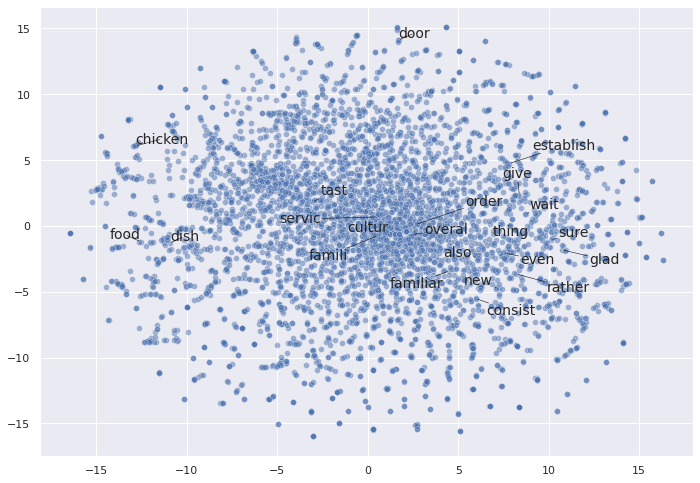

In [ ]:
sns.set()# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts

texts = []
words_to_plot = list(np.arange(0, 110, 5))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df_word2vec.index[word], fontsize = 14))

# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

## Create Document Vector

In [ ]:
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.vocab]
    return np.mean(word2vec_model[doc], axis=0)

# Function that will help us drop documents that have no word vectors in word2vec
def has_vector_representation(word2vec_model, doc):
    """check if at least one word of the document is in the
    word2vec dictionary"""
    return not all(word not in word2vec_model.vocab for word in doc)


# Filter out documents
def filter_docs(corpus, texts, condition_on_doc):
    """
    Filter corpus and texts given the function condition_on_doc which takes a doc. The document doc is kept if condition_on_doc(doc) is true.
    """
    number_of_docs = len(corpus)

    if texts is not None:
        texts = [text for (text, doc) in zip(texts, corpus)
                 if condition_on_doc(doc)]

    corpus = [doc for doc in corpus if condition_on_doc(doc)]

    print("{} docs removed".format(number_of_docs - len(corpus)))

    return (corpus, texts)

## Preprocess the Documents

In [ ]:
# Preprocess the corpus
corpus = [review for review in reviews]

# Remove docs that don't include any words in W2V's vocab
corpus, review_list = filter_docs(corpus, reviews, lambda doc: has_vector_representation(wv, doc))

# Filter out any empty docs
corpus, review_list = filter_docs(corpus, review_list, lambda doc: (len(doc) != 0))
x = []
for doc in corpus: # append the vector for each document
    x.append(document_vector(wv, doc))
    
X = np.array(x) # list to array

5 docs removed
0 docs removed


## Fit TSNE and Visualize Document Clusters for Fake Reviews

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


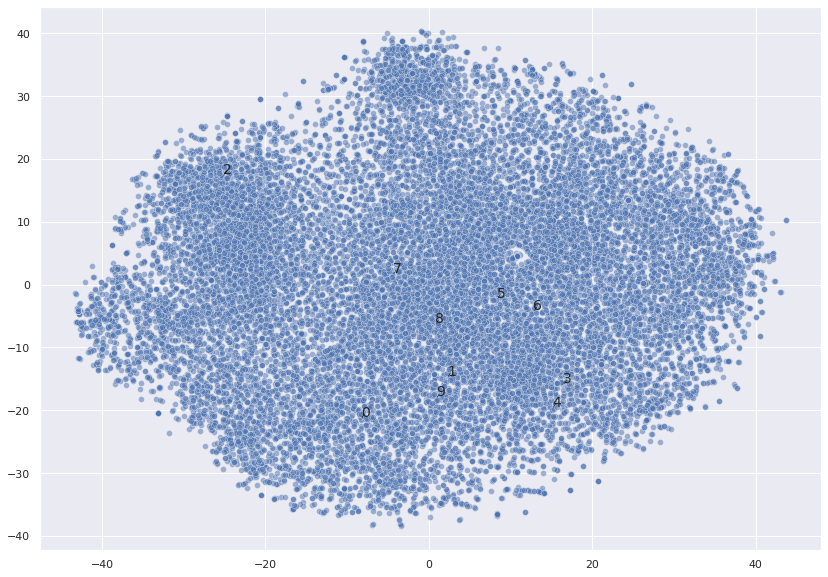

In [ ]:
# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Again use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(X)
fig, ax = plt.subplots(figsize = (14, 10))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

texts = []
reviews_to_plot = list(np.arange(0, 10, 1)) # plots every 10th review in first 110 reviews

# Append words to list
for review in reviews_to_plot:
    texts.append(plt.text(tsne_df[review, 0], tsne_df[review, 1], reviews_to_plot[review], fontsize = 14))
    
# Plot text using adjust_text
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

## Separete Real Reviews

In [ ]:
words = []
reviews = df['Cleand_Review'][df['Real']==1]
for review in reviews:
  tokens = review.split()
  for token in tokens:
    words.append(token)
#wv = api.load('word2vec-google-news-300')
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [wv[word] for word in words if word in wv.vocab]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in wv.vocab]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df_word2vec = pd.DataFrame.from_dict(word_vec_dict, orient='index')
print(df_word2vec.head(3))

            0         1         2         3         4         5         6    \
good   0.040527  0.062500 -0.017456  0.078613  0.032715 -0.012634  0.009644   
chang -0.197266  0.212891 -0.027466  0.010132 -0.080078 -0.033203 -0.029175   
pace   0.165039  0.314453  0.149414  0.073242 -0.259766 -0.229492  0.026611   

            7         8         9    ...       290       291       292  \
good   0.123535 -0.021484  0.152344  ...  0.014221  0.187500 -0.165039   
chang -0.083008  0.088379 -0.126953  ...  0.183594  0.036377  0.130859   
pace  -0.001366  0.053467  0.081543  ... -0.004028 -0.186523 -0.134766   

            293       294       295       296       297       298       299  
good   0.015381 -0.041748  0.054443 -0.011841 -0.156250  0.001930 -0.069824  
chang -0.039551  0.002228 -0.271484 -0.324219 -0.285156 -0.142578  0.466797  
pace   0.182617  0.029663 -0.030640  0.010681  0.178711 -0.190430 -0.112793  

[3 rows x 300 columns]


## Create Word CLusters for Real Reviews using TSNE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


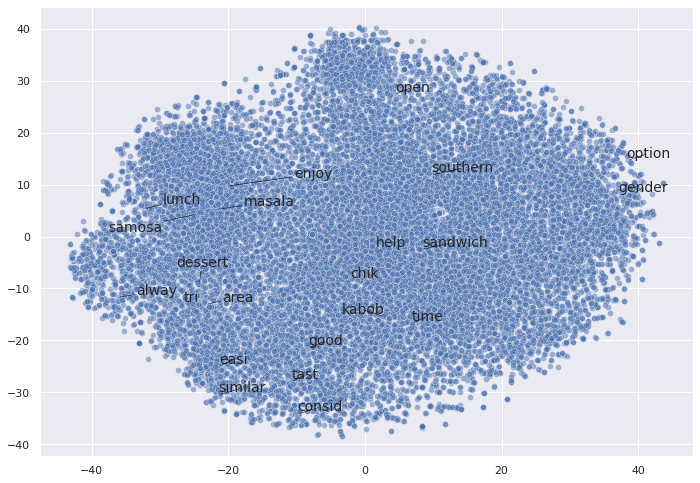

In [ ]:
sns.set()# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts

texts = []
words_to_plot = list(np.arange(0, 110, 5))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df_word2vec.index[word], fontsize = 14))

# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

## Preprocess Real Reviews

In [ ]:
# Preprocess the corpus
corpus = [review for review in reviews]

# Remove docs that don't include any words in W2V's vocab
corpus, review_list = filter_docs(corpus, reviews, lambda doc: has_vector_representation(wv, doc))

# Filter out any empty docs
corpus, review_list = filter_docs(corpus, review_list, lambda doc: (len(doc) != 0))
x = []
for doc in corpus: # append the vector for each document
    x.append(document_vector(wv, doc))
    
X = np.array(x) # list to array

3 docs removed
0 docs removed


## Create Document Clusters for Real Reviews

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


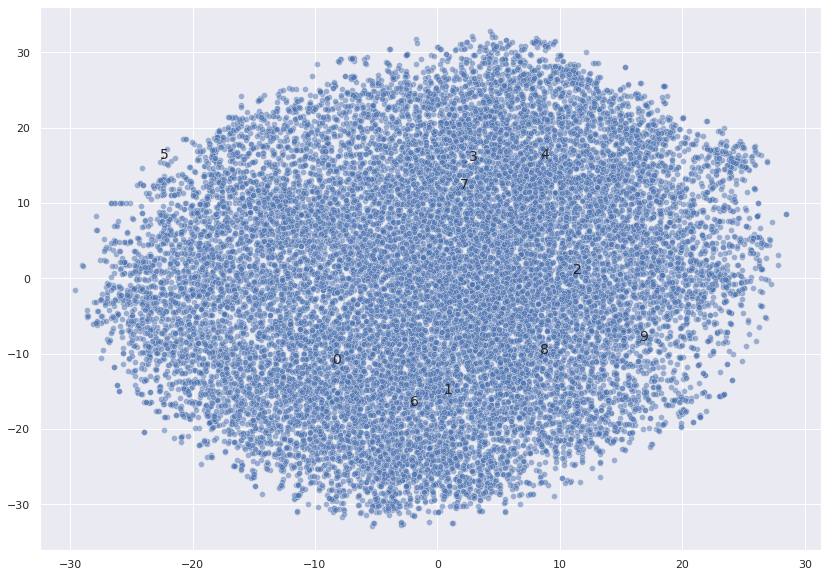

In [ ]:
# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Again use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(X)
fig, ax = plt.subplots(figsize = (14, 10))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

texts = []
reviews_to_plot = list(np.arange(0, 10, 1)) # plots every 10th review in first 110 reviews

# Append words to list
for review in reviews_to_plot:
    texts.append(plt.text(tsne_df[review, 0], tsne_df[review, 1], reviews_to_plot[review], fontsize = 14))
    
# Plot text using adjust_text
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

# Topic Modeling using pyLDAvis

## Import Packages

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
!pip install pyldavis
import pyLDAvis.sklearn

     |████████████████████████████████| 1.7 MB 10.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=17e260b9a18c01009945f9dd598f6ee955a477838a5d5f1fb82bf443173595c7
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


## Create Topic Modeling for Real Reviews



In [ ]:
real_review = df['Cleand_Review'][df['Real'] == 1]

num_topics = 10
num_features=4000

vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words='english')
lda = LatentDirichletAllocation(n_components=num_topics,
                                max_iter=5, 
                                learning_method='online', 
                                learning_offset=50.,
                                random_state=0)

lda_pipeline = Pipeline([('vectorizer', vectorizer), ('lda', lda)])
lda_pipeline.fit(real_review)
pyLDAvis.enable_notebook()
data_vectorized = vectorizer.fit_transform(df['Cleand_Review'])
dash = pyLDAvis.sklearn.prepare(lda_pipeline.steps[1][1], data_vectorized, vectorizer, mds='tsne')
pyLDAvis.save_html(dash, '/root/real_reviews_lda.html')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

## Create Topic Modeling for Fake Reviews

In [ ]:
fake_review = df['Cleand_Review'][df['Real'] == 0]

num_topics = 10
num_features=200

vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words='english')
lda = LatentDirichletAllocation(n_components=num_topics,
                                max_iter=5, 
                                learning_method='online', 
                                learning_offset=50.,
                                random_state=0)

lda_pipeline = Pipeline([('vectorizer', vectorizer), ('lda', lda)])
lda_pipeline.fit(fake_review)
pyLDAvis.enable_notebook()
data_vectorized = vectorizer.fit_transform(df['Cleand_Review'])
dash = pyLDAvis.sklearn.prepare(lda_pipeline.steps[1][1], data_vectorized, vectorizer, mds='tsne')
pyLDAvis.save_html(dash, '/root/fake_reviews_lda.html')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

# Create Logistic Regression Model to Test N-gram Features

## Function to Extract N-gram Features



In [ ]:
def extract_features(df,field,training_data,testing_data,gram_from,gram_to):
  '''
  The following module extracts TFIDF based feature of n grams. It can generate
  TF-IDF from 1 gram to n or only n grams, defined by gram_from and gram_to
  '''

  tfidf_vectorizer = TfidfVectorizer(ngram_range=(gram_from, gram_to))
  tfidf_vectorizer.fit_transform(df[field]).todense()

  train_feature_set=tfidf_vectorizer.transform(training_data[field].values)
  test_feature_set=tfidf_vectorizer.transform(testing_data[field].values)
  steps = [('lda', LinearDiscriminantAnalysis()), ('m', GaussianNB())]
  model = Pipeline(steps=steps)
  return train_feature_set,test_feature_set,tfidf_vectorizer

## Function to Get Prediction

In [ ]:
def get_predictions(model,X_test):
    
  # This module gets prediction from a trained logistic regression model
  probs = model.predict_proba(X_test)
  preds = []
  for item in probs:
    if item[0]> item[1]:
      preds.append(0)
    else:
      preds.append(1)
      
  return preds

## Function to Calculate Accuracy

In [ ]:
def compute_accuracy(Y_test,preds):
  # This module compute accuracy of the logistic regression model
  match = 0
  non_match = 0
  for i in range(0,len(Y_test)):
    if Y_test[i]!= preds[i]:
      non_match += 1
    else:
      match += 1

  return non_match/(match+non_match)

## Separete Training and Testing Samples

In [ ]:
# GET A TRAIN TEST SPLIT (set seed for consistent results)
training_data, testing_data = train_test_split(df,random_state = 2000)
# GET LABELS
Y_train=training_data['Real'].values
Y_test=testing_data['Real'].values

## Create Logistic Regression Model and Save Accuracies for N-gram of Words

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
features = []
accuracies_LR = []
accuracies_SVM = []
accuracies_RF = []
count = 0
counts_LR = []
counts_SVM = []
counts_RF = []
counts = []
Importance_Features_combined_all = []
for ngram_from in range(1,5):
  for ngram_to in range(ngram_from,5):    
    # GET FEATURES
    X_train,X_test,feature_transformer=extract_features(df,'Cleand_Review',training_data,testing_data,ngram_from,ngram_to)
    print(X_train.shape)
    #logging.info("Training a Logistic Regression Model...")
    scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=10000)
    model1 = scikit_log_reg.fit(X_train,Y_train)
    model1.fit(X_train,Y_train)
    # GET TOP K PREDICTIONS
    preds=get_predictions(model1,X_test)
    accuracy=compute_accuracy(Y_test,preds)
    accuracies_LR.append(accuracy)
    counts_LR.append(count)
    counts.append(count)
    count += 1

    model2 = make_pipeline(StandardScaler(with_mean=False), SVC(gamma='auto',probability=True))
    model2.fit(X_train,Y_train)
    # GET TOP K PREDICTIONS
    preds=get_predictions(model2,X_test)
    accuracy=compute_accuracy(Y_test,preds)
    accuracies_SVM.append(accuracy)
    counts_SVM.append(count)
    counts.append(count)
    count += 1

    model3 = RandomForestClassifier(max_depth=2, random_state=0)
    model3.fit(X_train,Y_train)
    # GET TOP K PREDICTIONS
    preds=get_predictions(model3,X_test)
    accuracy=compute_accuracy(Y_test,preds)
    accuracies_RF.append(accuracy)
    
    # summarize feature importance
    #if ngram_from==1 and ngram_to == 9:
    #  importance = model.coef_[0]
    #  Importance_Features_combined_all.append(importance)
    # GET PREDICTED VALUES AND GROUND TRUTH INTO A LIST OF LISTS
    
    feature_name = str(ngram_from)+","+str(ngram_to)
    features.append("")
    features.append(feature_name)
    features.append("")
    counts_RF.append(count)
    counts.append(count)
    count += 1
    del X_train 
    del X_test 
    del feature_transformer
    del scikit_log_reg
    #del model 
    del preds
    del accuracy
    del feature_name



(1500, 2706)
[LibLinear][LibLinear](1500, 16521)
[LibLinear][LibLinear](1500, 32173)
[LibLinear][LibLinear](1500, 46590)
[LibLinear][LibLinear](1500, 13815)
[LibLinear][LibLinear](1500, 29467)
[LibLinear][LibLinear](1500, 43884)
[LibLinear][LibLinear](1500, 15652)
[LibLinear][LibLinear](1500, 30069)
[LibLinear][LibLinear](1500, 14417)
[LibLinear][LibLinear]

## Visualize Performance for N-gram of Words

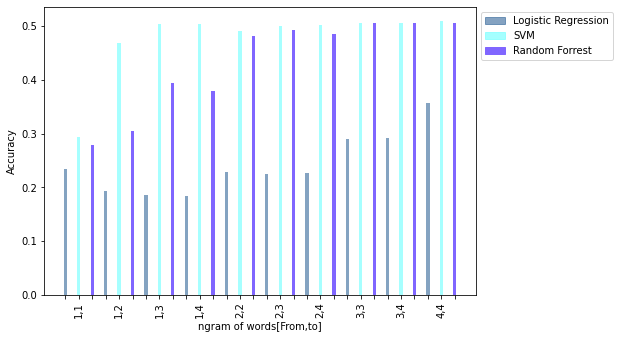

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#ax.bar(counts, accuracies, color=(0.2, 0.4, 0.6, 0.6), width = 0.25)
ax.bar(counts_LR , accuracies_LR, color = (0.2, 0.4, 0.6, 0.6), width = 0.25)
ax.bar(counts_SVM , accuracies_SVM, color = (0.5, 1, 1, 0.7), width = 0.25)
ax.bar(counts_RF , accuracies_RF, color = (0.5, 0.4, 1, 1), width = 0.25)
ax.set_ylabel('Accuracy')
ax.set_xlabel('ngram of words[From,to]')
ax.set_xticks(counts)
ax.set_xticklabels(features, rotation=90)
colors = {'Logistic Regression':(0.2, 0.4, 0.6, 0.6), 'SVM':(0.5, 1, 1, 0.7), 'Random Forrest': (0.5, 0.4, 1, 1)}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, bbox_to_anchor=(1, 1))

## Visualize Performance of Feature Selection


Streaming output truncated to the last 5000 lines.
Feature: 88534, Score: 0.00000
Feature: 88535, Score: -0.23172
Feature: 88536, Score: 0.10279
Feature: 88537, Score: 0.10279
Feature: 88538, Score: 0.10279
Feature: 88539, Score: 0.10279
Feature: 88540, Score: 0.10279
Feature: 88541, Score: 0.15991
Feature: 88542, Score: 0.15991
Feature: 88543, Score: 0.15991
Feature: 88544, Score: 0.15991
Feature: 88545, Score: 0.15991
Feature: 88546, Score: 0.15991
Feature: 88547, Score: 0.15991
Feature: 88548, Score: 0.11622
Feature: 88549, Score: 0.11622
Feature: 88550, Score: 0.11622
Feature: 88551, Score: 0.11622
Feature: 88552, Score: 0.11447
Feature: 88553, Score: 0.11447
Feature: 88554, Score: 0.11447
Feature: 88555, Score: 0.11447
Feature: 88556, Score: 0.11447
Feature: 88557, Score: 0.11447
Feature: 88558, Score: 0.11447
Feature: 88559, Score: 0.11447
Feature: 88560, Score: 0.00000
Feature: 88561, Score: 0.00000
Feature: 88562, Score: -0.15124
Feature: 88563, Score: -0.15124
Feature: 88564, 

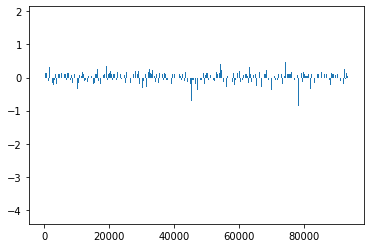

In [ ]:
from matplotlib import pyplot
X_train,X_test,feature_transformer=extract_features(df,'Cleand_Review',training_data,testing_data,1,9)

#logging.info("Training a Logistic Regression Model...")
scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=10000)
model=scikit_log_reg.fit(X_train,Y_train)

# GET TOP K PREDICTIONS
preds=get_predictions(model,X_test)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Train and Save Accuracies for N-gram of POS Tags

In [ ]:
# GET A TRAIN TEST SPLIT (set seed for consistent results)
training_data, testing_data = train_test_split(df,random_state = 2000)
# GET LABELS
Y_train=training_data['Real'].values
Y_test=testing_data['Real'].values
features_pos = []
accuracies_LR = []
accuracies_SVM = []
accuracies_RF = []
count = 0
counts_LR = []
counts_SVM = []
counts_RF = []
counts = []
for ngram_from in range(1,6):
  for ngram_to in range(ngram_from,6):    
    # GET FEATURES
    X_train,X_test,feature_transformer=extract_features(df,'Pos_Tags',training_data,testing_data,ngram_from,ngram_to)

    #logging.info("Training a Logistic Regression Model...")
    scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=10000)
    model1 = scikit_log_reg.fit(X_train,Y_train)
    model1.fit(X_train,Y_train)
    # GET TOP K PREDICTIONS
    preds=get_predictions(model1,X_test)
    accuracy=compute_accuracy(Y_test,preds)
    accuracies_LR.append(accuracy)
    counts_LR.append(count)
    counts.append(count)
    count += 1

    model2 = make_pipeline(StandardScaler(with_mean=False), SVC(gamma='auto',probability=True))
    model2.fit(X_train,Y_train)
    # GET TOP K PREDICTIONS
    preds=get_predictions(model2,X_test)
    accuracy=compute_accuracy(Y_test,preds)
    accuracies_SVM.append(accuracy)
    counts_SVM.append(count)
    counts.append(count)
    count += 1

    model3 = RandomForestClassifier(max_depth=2, random_state=0)
    model3.fit(X_train,Y_train)
    # GET TOP K PREDICTIONS
    preds=get_predictions(model3,X_test)
    accuracy=compute_accuracy(Y_test,preds)
    counts.append(count)
    accuracies_RF.append(accuracy)
    
    # summarize feature importance
    #if ngram_from==1 and ngram_to == 9:
    #  importance = model.coef_[0]
    #  Importance_Features_combined_all.append(importance)
    # GET PREDICTED VALUES AND GROUND TRUTH INTO A LIST OF LISTS
    
    feature_name = str(ngram_from)+","+str(ngram_to)
    features.append("")
    features.append(feature_name)
    features.append("")
    counts_RF.append(count)
    count += 1

print(features_pos)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][]


## Visualize Performance of N-gram of POS Tags

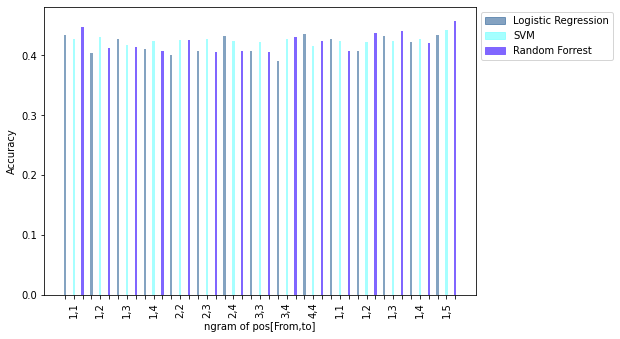

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#ax.bar(counts, accuracies, color=(0.2, 0.4, 0.6, 0.6), width = 0.25)
ax.bar(counts_LR , accuracies_LR, color = (0.2, 0.4, 0.6, 0.6), width = 0.25)
ax.bar(counts_SVM , accuracies_SVM, color = (0.5, 1, 1, 0.7), width = 0.25)
ax.bar(counts_RF , accuracies_RF, color = (0.5, 0.4, 1, 1), width = 0.25)
ax.set_ylabel('Accuracy')
ax.set_xlabel('ngram of pos[From,to]')
ax.set_xticks(counts)
ax.set_xticklabels(features, rotation=90)
colors = {'Logistic Regression':(0.2, 0.4, 0.6, 0.6), 'SVM':(0.5, 1, 1, 0.7), 'Random Forrest': (0.5, 0.4, 1, 1)}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, bbox_to_anchor=(1, 1))

# Deceptive Linguestic Cue Analysis

## Upload MPQA Lexicals

In [ ]:
# Upload MPQA Lexicals
uploaded = files.upload()
df_MPQA = pd.read_csv(io.BytesIO(uploaded['subjclueslen1-HLTEMNLP05.csv']), header = None)

Saving subjclueslen1-HLTEMNLP05.csv to subjclueslen1-HLTEMNLP05.csv


## Create Different Dictonaries from the Lexicals

In [ ]:
# Process the MPQA Lexicals Files
subjectivity = []
length = []
word = []
tag = []
stem = []
polarity = []

word_polarity = {}
word_tag = {}
word_subjectivity = {}

for item in df_MPQA[0]:

  parts = item.split(" ")
  subjectivity.append(parts[0])
  length.append(parts[1])
  word.append(parts[2])
  tag.append(parts[3])
  stem.append(parts[4])
  polarity.append(parts[5])
  word_sep=(parts[2].split("="))[1]
  polarity_sep= (parts[5].split("="))
  if len(polarity_sep)==2:
    word_polarity[word_sep] = polarity_sep[1]

  tag_sep= (parts[3].split("="))
  if len(tag_sep)==2:
    word_tag[word_sep] = tag_sep[1]

  subjectivity_sep= (parts[0].split("="))
  if len(subjectivity_sep)==2:
    word_subjectivity[word_sep] = subjectivity_sep[1]

print(word_subjectivity)

df_msqa_subjectivity = pd.DataFrame()

df_msqa_subjectivity['subjectivity'] = subjectivity
df_msqa_subjectivity['length'] = length
df_msqa_subjectivity['word'] = word
df_msqa_subjectivity['tag'] = tag
df_msqa_subjectivity['stem'] = stem
df_msqa_subjectivity['polarity'] = polarity

print(df_msqa_subjectivity)

{'abandoned': 'weaksubj', 'abandonment': 'weaksubj', 'abandon': 'weaksubj', 'abase': 'strongsubj', 'abasement': 'strongsubj', 'abash': 'strongsubj', 'abate': 'weaksubj', 'abdicate': 'weaksubj', 'aberration': 'strongsubj', 'abhor': 'strongsubj', 'abhorred': 'strongsubj', 'abhorrence': 'strongsubj', 'abhorrent': 'strongsubj', 'abhorrently': 'strongsubj', 'abhors': 'strongsubj', 'abidance': 'strongsubj', 'abide': 'strongsubj', 'abject': 'strongsubj', 'abjectly': 'strongsubj', 'abjure': 'weaksubj', 'abilities': 'weaksubj', 'ability': 'weaksubj', 'able': 'weaksubj', 'abnormal': 'weaksubj', 'abolish': 'weaksubj', 'abominable': 'strongsubj', 'abominably': 'strongsubj', 'abominate': 'strongsubj', 'abomination': 'strongsubj', 'above': 'weaksubj', 'above-average': 'weaksubj', 'abound': 'weaksubj', 'abrade': 'weaksubj', 'abrasive': 'strongsubj', 'abrupt': 'weaksubj', 'abscond': 'strongsubj', 'absence': 'weaksubj', 'absentee': 'weaksubj', 'absent-minded': 'strongsubj', 'absolve': 'strongsubj', 'ab

## Create Some Required Own Lexicals

In [ ]:
# Defines questions groups
first_person_singular_pronouns = ['i','me', 'my', 'mine', 'myself']
third_person_pronouns = ['he', 'him' , 'his' , 'himself', 'she',	'her' , 'hers', 'herself', 'it' , 'its', 'itself', 'they' ,'them' , 'their' , 'theirs' , 'themself' ]
group_pronouns = [ 'we',	'us', 	'our' , 'ours', 	'ourselves', 'they' ,'them' , 'their' , 'theirs' , 'themself' ]

# Define Necessity Words
necessity_words = ['essential', 'fundamental', 'obligation', 'precondition', 'prerequisite', 'requirement', 'urgency', 'call', 'cause', 'claim', 'compulsion', 'demand', 'desideratum', 'duress', 'essence', 'exaction', 'exigency', 'godsend', 'imperative', 'indispensability','inevitability', 'inexorableness', 'must', 'must-have', 'necessary', 'pinch', 'privation', 'requisite', 'stress', 'vitals', 'want', 'life or death'  , 'needfulness', 'no alternative', 'no choice', 'sine qua non', 'undeniability', 'vital part' ]
# Define Possibility Words
necessity_words = []

# List of articles
articles = ['a', 'an', 'the']

## Extract Linguestic Features

In [ ]:


# Analyze positivity within fake reviews
# Calculate the probability of positivity in each review
positive_word_density = []
modifier_word_density = []
strong_subjectivity_word_density = []
quotation_frequency = []
question_frequency = []
number_all_density = []
self_reference_density = []
group_reference_density = []
articles_density = []

for item in df['Review']:
  words = word_tokenize(item.lower())
  
  #stems = [stemmer.stem(word) for word in word_tokens]
  #words = [lemmatizer.lemmatize(word, pos ='v') for word in stems]
  count_positive = 0
  count_negative = 0
  count_modifiers = 0
  count_weaksubj = 0
  count_strongsubj = 0
  count_quotation = 0
  count_question = 0
  count_number = 0
  count_self_reference = 0
  count_group_reference = 0
  count_articles = 0
  count = 0

  # Find qutation frequency 
  # Find double qutations
  start_pt = item.find("\"")
  end_pt = item.find("\"", start_pt + 1)
  if start_pt != -1 and end_pt != -1:
    count_quotation += 1


  if count_quotation != 0:
    frequency_quotation = count_quotation
  else:
    frequency_quotation = 0

  for val in words:
    
    # Count positive and negative words to calculate positive word density
    # Check if value is in polarity dictionary
    if val in word_polarity.keys():
      
      if(word_polarity[val]=='positive'):
        count_positive += 1

      elif(word_polarity[val]=='negative'):
        count_negative += 1
    
    

    # Count modifiers in the sentence
    if val in word_tag.keys():
      if(word_tag[val]=='adj' or word_tag[val]=='adverb' or word_tag[val]=='anypos'):
        count_modifiers += 1
      #elif(word_tag[val]=='anypos'):
      #  if words[count+1] in word_tag.keys():
      #    if(word_tag[words[count+1]]=='noun'or word_tag[words[count+1]]=='verb'):
      #      count_modifiers += 1

    if val in word_subjectivity.keys():
      if(word_subjectivity[val]=='weaksubj'):
          count_weaksubj += 1
      elif(word_subjectivity[val]=='strongsubj'):
          count_strongsubj += 1

    # Find questions in the reviews
    if val == '?':
      count_question += 1

    count += 1

    # Find Numbers in Text
    if val.isdigit():
      count_number += 1

    # Find self reference in Text
    if val in first_person_singular_pronouns:
      count_self_reference += 1

    # Find self reference in Text
    if val in third_person_pronouns:
      count_group_reference += 1
  
    # Find articles in Text
    if val in articles:
      count_articles += 1
  if (count_positive+count_negative)!=0:
    positive_density = count_positive/(count_positive + count_negative)
  else:
    positive_density = 0
  
  modifiers_density = count_modifiers / count
  if (count_strongsubj+count_weaksubj)!=0:
    strong_subjectivity_density = count_strongsubj/(count_strongsubj + count_weaksubj)
  else:
    strong_subjectivity_density = 0
  number_density = count_number / count

  positive_word_density.append(positive_density)
  modifier_word_density.append(modifiers_density)
  strong_subjectivity_word_density.append(strong_subjectivity_density)
  quotation_frequency.append(frequency_quotation)
  question_frequency.append(count_question)
  number_all_density.append(number_density)
  self_reference_density.append(count_self_reference/count)
  group_reference_density.append(count_group_reference/count)
  articles_density.append(count_articles/count)

df_linguestic_clues = pd.DataFrame()
df_linguestic_clues['positive_word_density'] = positive_word_density
df_linguestic_clues['modifier_word_density'] = modifier_word_density
df_linguestic_clues['strong_subjectivity_word_density'] = strong_subjectivity_word_density
df_linguestic_clues['quotation_frequency'] = quotation_frequency
df_linguestic_clues['question_frequency'] = question_frequency
df_linguestic_clues['number_all_density'] = number_all_density
df_linguestic_clues['self_reference_density'] = self_reference_density
df_linguestic_clues['group_reference_density'] = group_reference_density
df_linguestic_clues['articles_density'] = articles_density
df_linguestic_clues['Real'] = df['Real']


## Make a Linear Regression Model and Save R-Squared Values

In [ ]:
from sklearn.linear_model import LinearRegression
r_sqs = []
names = []
counts = []
count = 0
#x = df_linguestic_clues.drop(['Real'], axis=1)
x = df_linguestic_clues['positive_word_density']
y = df_linguestic_clues['Real']
x, y = np.array(x).reshape(-1, 1) , np.array(y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

r_sqs.append(r_sq)
names.append('positive_word_density')
counts.append(count)
count += 1 

x = df_linguestic_clues['modifier_word_density']
y = df_linguestic_clues['Real']
x, y = np.array(x).reshape(-1, 1) , np.array(y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
r_sqs.append(r_sq)
names.append('modifier_word_density')
counts.append(count)
count += 1 

x = df_linguestic_clues['strong_subjectivity_word_density']
y = df_linguestic_clues['Real']
x, y = np.array(x).reshape(-1, 1) , np.array(y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
r_sqs.append(r_sq)
names.append('strong_subjectivity_word_density')
counts.append(count)
count += 1 

x = df_linguestic_clues['quotation_frequency']
y = df_linguestic_clues['Real']
x, y = np.array(x).reshape(-1, 1) , np.array(y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
counts.append(count)
count += 1 

r_sqs.append(r_sq)
names.append('quotation_frequency')

x = df_linguestic_clues['question_frequency']
y = df_linguestic_clues['Real']
x, y = np.array(x).reshape(-1, 1) , np.array(y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
counts.append(count)
count += 1 
r_sqs.append(r_sq)
names.append('question_frequency')

x = df_linguestic_clues['number_all_density']
y = df_linguestic_clues['Real']
x, y = np.array(x).reshape(-1, 1) , np.array(y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
counts.append(count)
count += 1 
r_sqs.append(r_sq)
names.append('number_all_density')

x = df_linguestic_clues['self_reference_density']
y = df_linguestic_clues['Real']
x, y = np.array(x).reshape(-1, 1) , np.array(y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
counts.append(count)
count += 1 
r_sqs.append(r_sq)
names.append('self_reference_density')

x = df_linguestic_clues['group_reference_density']
y = df_linguestic_clues['Real']
x, y = np.array(x).reshape(-1, 1) , np.array(y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
counts.append(count)
count += 1 
r_sqs.append(r_sq)
names.append('group_reference_density')

x = df_linguestic_clues['articles_density']
y = df_linguestic_clues['Real']
x, y = np.array(x).reshape(-1, 1) , np.array(y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
counts.append(count)
count += 1 
r_sqs.append(r_sq)
names.append('articles_density')
#'positive_word_density', 'modifier_word_density', 'strong_subjectivity_word_density', 'quotation_frequency', 'question_frequency', 'number_all_density', 'self_reference_density', 'group_reference_density', 'articles_density', 'Real'

x = df_linguestic_clues.drop(['positive_word_density', 'modifier_word_density', 'strong_subjectivity_word_density', 'quotation_frequency', 'question_frequency', 'number_all_density','articles_density', 'Real'], axis=1)
y = df_linguestic_clues['Real']
x, y = np.array(x) , np.array(y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

x = df_linguestic_clues.drop(['positive_word_density', 'modifier_word_density', 'strong_subjectivity_word_density', 'quotation_frequency', 'question_frequency','articles_density', 'Real'], axis=1)
y = df_linguestic_clues['Real']
x, y = np.array(x) , np.array(y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

x = df_linguestic_clues.drop(['positive_word_density', 'modifier_word_density', 'strong_subjectivity_word_density', 'quotation_frequency', 'question_frequency', 'Real'], axis=1)
y = df_linguestic_clues['Real']
x, y = np.array(x) , np.array(y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

x = df_linguestic_clues.drop(['modifier_word_density', 'strong_subjectivity_word_density', 'quotation_frequency', 'question_frequency','articles_density', 'Real'], axis=1)
y = df_linguestic_clues['Real']
x, y = np.array(x) , np.array(y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

x = df_linguestic_clues.drop(['modifier_word_density', 'strong_subjectivity_word_density', 'quotation_frequency','articles_density', 'Real'], axis=1)
y = df_linguestic_clues['Real']
x, y = np.array(x) , np.array(y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

x = df_linguestic_clues.drop(['modifier_word_density', 'quotation_frequency','articles_density', 'Real'], axis=1)
y = df_linguestic_clues['Real']
x, y = np.array(x) , np.array(y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

x = df_linguestic_clues.drop([ 'quotation_frequency','articles_density', 'Real'], axis=1)
y = df_linguestic_clues['Real']
x, y = np.array(x) , np.array(y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

x = df_linguestic_clues.drop([ 'quotation_frequency', 'Real'], axis=1)
y = df_linguestic_clues['Real']
x, y = np.array(x) , np.array(y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

x = df_linguestic_clues.drop([ 'Real'], axis=1)
y = df_linguestic_clues['Real']
x, y = np.array(x) , np.array(y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
r_sqs.append(r_sq)
names.append('combined')
counts.append(count)
count += 1 

coefficient of determination: 0.0010098990066007563
coefficient of determination: 0.001740501369481784
coefficient of determination: 4.700610589658538e-08
coefficient of determination: 0.004185947979229221
coefficient of determination: 0.0011538663667706173
coefficient of determination: 0.00023793255401682867
coefficient of determination: 0.021079410389125197
coefficient of determination: 0.008659352996722713
coefficient of determination: 0.137706152713031
coefficient of determination: 0.028576157235916333
coefficient of determination: 0.029084949530870152
coefficient of determination: 0.20140384666939015
coefficient of determination: 0.029612198575742932
coefficient of determination: 0.030425954359607155
coefficient of determination: 0.031010110896988352
coefficient of determination: 0.031011875120652843
coefficient of determination: 0.2123456686399947
coefficient of determination: 0.21299601424982173


## Visualize the Performnce of Deceptive Linguestic Cues

[Text(0, 0, 'positive_word_density'),
 Text(0, 0, 'modifier_word_density'),
 Text(0, 0, 'strong_subjectivity_word_density'),
 Text(0, 0, 'quotation_frequency'),
 Text(0, 0, 'question_frequency'),
 Text(0, 0, 'number_all_density'),
 Text(0, 0, 'self_reference_density'),
 Text(0, 0, 'group_reference_density'),
 Text(0, 0, 'articles_density'),
 Text(0, 0, 'combined')]

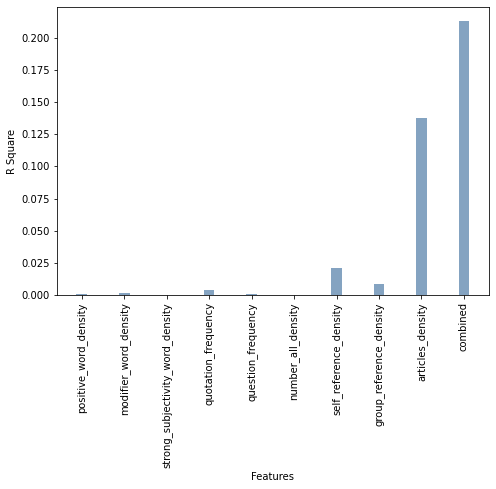

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(counts, r_sqs, color = (0.2, 0.4, 0.6, 0.6), width = 0.25)
ax.set_ylabel('R Square')
ax.set_xlabel('Features')
ax.set_xticks(counts)
ax.set_xticklabels(names, rotation=90)

# Fake Review Classification using Recurrent Convolutional Neural Network 

## Create Model and Define Functions

In [ ]:
# Source: https://towardsdatascience.com/fake-news-classification-with-recurrent-convolutional-neural-networks-4a081ff69f1a
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence
from keras.models import Sequential, load_model
from keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint

class LSTM_Text_Classifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, embedding_vector_length, max_seq_length, lstm_layers, batch_size=32, num_epochs=3, use_hash=False,
                dropout=None, conv_params=None):
        
        """
        __init__ method: creates the tokenizer for the model and saves all of the parameters
        embedding_vector_length - the length of the word vectors that will be learned by the embedding layer
        max_seq_length - the longest sequence of words that will be taken into account by the classifier (ie. 500 words)
        lstm_layers - a list with the number of LSTMs in each recurrent layer
        batch_size - the batch size used for training the model
        num_epochs - the maximum number of epochs to train for
        use_hash - whether or not to use the hashing trick for word indexing
        dropout - the dropout rate used in the dropout layers of the model
        conv_params - a dictionary with parameters for the convolutional part of the model
        """
        
        self.embedding_vector_length = embedding_vector_length
        self.max_seq_length = max_seq_length
        self.lstm_layer_sizes = lstm_layers
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.use_hashing_trick = use_hash
        if not self.use_hashing_trick:
            self.tokenizer = Tokenizer()
        self.dropout = dropout
        self.conv_params = conv_params
        
    
    def _get_word_index(self, word):
        """
        This function retrieves the index for a given word using the tokenizer.
        """
        
        try:
            return self.tokenizer.word_index[word]
        except:
            return None
        
    def _text_to_int_sequence(self, text):
        "This function converts a string of text into an integer sequence"
        
        seq = [self._get_word_index(word) for word in text_to_word_sequence(text)]
        return [index for index in seq if index]
        
    def fit(self, X, y, validation_data):
        """
        This fit function is analagous to the Scikit-learn fit function used for its estimator API.
        X (array-like) - features (text data)
        y (array-like) - target (class labels)
        validation_data - a tuple with the validation features and targets
        """
        
        all_X = pd.concat([X, validation_data[0]])
        if self.use_hashing_trick:
            all_words = set()
            for text in all_X:
                new_words = set(text_to_word_sequence(text))
                all_words = all_words.union(new_words)
            self.max_vocab = len(all_words)*1.3
            
            for i in range(len(X)):
                X[i] = hashing_trick(X[i], max_vocab, hash_function='md5')
            X_pad = sequence.pad_sequences(X, maxlen=self.max_seq_length)
            
            X_valid = validation_data[0]
            
            for i in range(len(X_valid)):
                X_valid[i] = hashing_trick(X_valid[i], max_vocab, hash_function='md5')
            X_valid_pad = sequence.pad_sequences(X_valid, maxlen=self.max_seq_length)
        
            y_valid = validation_data[1]
            
        else:    
            print('Fitting Tokenizer...')
            self.tokenizer.fit_on_texts(all_X)
            self.max_vocab = len(self.tokenizer.word_index) + 20
            X = X.apply(self._text_to_int_sequence)
            X_pad = sequence.pad_sequences(X, maxlen=self.max_seq_length)
        
            X_valid = validation_data[0].apply(self._text_to_int_sequence)
            X_valid_pad = sequence.pad_sequences(X_valid, maxlen=self.max_seq_length)
        
            y_valid = validation_data[1]
        
        self.model = Sequential()
        self.model.add(Embedding(self.max_vocab, self.embedding_vector_length, input_length=self.max_seq_length))
            
        if self.conv_params is not None:
            use_pooling = False
            if self.conv_params['pool_size'] is not None:
                use_pooling = True
            
            for i in range(self.conv_params['n_layers']):
                self.model.add(Conv1D(filters=2*(i+1)*self.conv_params['filters'], 
                                      kernel_size=self.conv_params['kernel_size'], 
                                      padding='same', activation='relu'))
                if use_pooling:
                    self.model.add(MaxPooling1D(pool_size=self.conv_params['pool_size']))

            
        if len(self.lstm_layer_sizes) > 1:
            for lstm_layer_size in self.lstm_layer_sizes[:-1]:
                self.model.add(LSTM(lstm_layer_size, return_sequences=True))
                self.model.add(Dropout(self.dropout))
            self.model.add(LSTM(self.lstm_layer_sizes[-1]))
        else:
            self.model.add(LSTM(self.lstm_layer_sizes[0]))
        if self.dropout is not None:
            self.model.add(Dropout(self.dropout))
        self.model.add(Dense(1, activation='sigmoid'))
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        early_stopping = EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=1,
                              verbose=2, mode='max')
        
        checkpoint = ModelCheckpoint(filepath='best_model',
                                     monitor='val_accuracy',
                                     mode='max',
                                     save_best_only=True)
        
        callbacks_list = [early_stopping, checkpoint]
        print(self.model.summary())
        
        print('Fitting model...')
        self.model.fit(X_pad, y, validation_data=(X_valid_pad, y_valid), 
                  epochs=self.num_epochs, batch_size=self.batch_size, callbacks=callbacks_list)
        
        
    def predict(self, X):
        """
        This function is analagous to the Scikit-learn predict function used for its estimator API. It first preprocesses the text
        data and converts it into an integer sequence.
        X (array-like) - input text data
        """
        if type(X) == pd.core.frame.DataFrame or type(X) == pd.core.series.Series:
            X = X.apply(self._text_to_int_sequence)
            X = sequence.pad_sequences(X, maxlen = self.max_seq_length)
            return np.argmax(self.model.predict(X),axis=1)
        elif type(X) == str:
            X = self._text_to_int_sequence(X)
            X = sequence.pad_sequences(X, maxlen = self.max_seq_length)
            return np.argmax(self.model.predict(X),axis=1)
        else:
            X = map(X, self._text_to_int_sequence)
            X = sequence.pad_sequences(X, maxlen = self.max_seq_length)
            return np.argmax(self.model.predict(X),axis=1)
        
    def predict_classes(self, X):
        """
        This function is a wrapper over the keras predict_classes method.It first preprocesses the text data and converts it into
        an integer sequence.
        """
        
        if type(X) == pd.core.frame.DataFrame or type(X) == pd.core.series.Series:
            X = X.apply(self._text_to_int_sequence)
            X = sequence.pad_sequences(X, maxlen = self.max_seq_length)
            return np.argmax(self.model.predict(X),axis=1)
        elif type(X) == str:
            X = self._text_to_int_sequence(X)
            X = sequence.pad_sequences(X, maxlen = self.max_seq_length)
            return  np.argmax(self.model.predict(np.array(X)),axis=1)
        else:
            X = map(X, self._text_to_int_sequence)
            X = sequence.pad_sequences(X, maxlen = self.max_seq_length)
            return np.argmax(self.model.predict(np.array(X)),axis=1)
    
    def predict_proba(self, X):
        """
        This function is a wrapper over the keras predict_proba method.It first preprocesses the text data and converts it into
        an integer sequence.
        """        
        if type(X) == pd.core.series.Series:
            X = X.apply(self._text_to_int_sequence)
            X = sequence.pad_sequences(X, maxlen = self.max_seq_length)
            return self.model.predict_proba(X)
        elif type(X) == str:
            X = self._text_to_int_sequence(X)
            X = sequence.pad_sequence(X, maxlen = self.max_seq_length)
            return self.model.predict_proba(np.array(X))
        else:
            X = map(X, self._text_to_word_sequence)
            X = sequence.pad_sequences(X, maxlen = self.max_seq_length)
            return self.model.predict_proba(np.array(X))
    
    def load_model(self, file_path):
        "This function is a wrapper over the Keras load_model function"
        
        self.model = load_model(file_path)
    
    def score(self, X, y):
        "This function is a wrapper over the Scikit-learn score function for its estimator API."
        
        pred = self.predict(X)
        return accuracy_score(y, pred)

## Build the Classifier

In [ ]:
lstm_classifier = LSTM_Text_Classifier(embedding_vector_length=64, max_seq_length=512, dropout=0.1, lstm_layers=[128, 128], batch_size=256, num_epochs=2, use_hash=False,
conv_params={'filters': 128, 
             'kernel_size': 5, 
             'pool_size': 2,
             'n_layers': 3})

## Extract the Training and Testing Data

In [ ]:
import re 
from spacy.lang.en.stop_words import STOP_WORDS

#nlp = en_core_web_md.load()
X = df['Cleand_Review']
y = df['Real']

data_processed = pd.DataFrame({'Cleand_Review': X, 'Real': y})

## Split Training and Testing Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Train the Model

In [ ]:
lstm_classifier.fit(X_train, y_train, validation_data=(X_valid, y_valid))

Fitting Tokenizer...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 512, 64)           1683584   
                                                                 
 conv1d_6 (Conv1D)           (None, 512, 256)          82176     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 256, 256)         0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 256, 512)          655872    
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 128, 512)         0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (Non

INFO:tensorflow:Assets written to: best_model/assets


INFO:tensorflow:Assets written to: best_model/assets


89/89 [==============================] - 648s 7s/step - loss: 0.4778 - accuracy: 0.7347 - val_loss: 0.2962 - val_accuracy: 0.8700
Epoch 2/2
89/89 [==============================] - ETA: 0s - loss: 0.2284 - accuracy: 0.9037

INFO:tensorflow:Assets written to: best_model/assets


INFO:tensorflow:Assets written to: best_model/assets


89/89 [==============================] - 637s 7s/step - loss: 0.2284 - accuracy: 0.9037 - val_loss: 0.2669 - val_accuracy: 0.8846


## Create Confusio Matrix

In [ ]:
lstm_classifier.load_model('best_model')
from sklearn.metrics import confusion_matrix, classification_report
#score, acc = lstm_classifier.evaluate(X_test, y_test,verbose=0)
#print('test accuracy:', acc)


y_pred = lstm_classifier.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred, digits=4))

[[2821    0]
 [2855    0]]
              precision    recall  f1-score   support

           0     0.4970    1.0000    0.6640      2821
           1     0.0000    0.0000    0.0000      2855

    accuracy                         0.4970      5676
   macro avg     0.2485    0.5000    0.3320      5676
weighted avg     0.2470    0.4970    0.3300      5676



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Find Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_test =  (lstm_classifier.predict_classes(X_test) > 0.5)*1
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      6099
           1       0.00      0.00      0.00      6064

    accuracy                           0.50     12163
   macro avg       0.25      0.50      0.33     12163
weighted avg       0.25      0.50      0.33     12163



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
